In [33]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


In [34]:
type(data)

dict

In [35]:
import pandas as pd

In [36]:
#See all Columns instead of only 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [37]:
df = pd.json_normalize(data['data'])

import pandas as pd
from datetime import datetime

df['timestamp'] = datetime.now()

df


KeyError: 'data'

In [31]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    df2 = pd.json_normalize(data['data'])
    from datetime import datetime
    df['timestamp'] = datetime.now()
    df_append = pd.DataFrame(df2)
    df = pd.concat([df2,df_append])


In [9]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [38]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10247,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.940620e+07,1.940620e+07,False,NaN,1,NaN,NaN,None,2023-06-19T05:11:00.000Z,26437.822717,9.647567e+09,-8.5796,0.102774,-0.382969,2.467611,-1.608784,-8.630907,-5.402510,5.130577e+11,48.1604,5.551943e+11,None,2023-06-19T05:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-19 01:14:02.757810
1,1027,Ethereum,ETH,ethereum,7015,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202088e+08,1.202088e+08,True,NaN,2,NaN,NaN,None,2023-06-19T05:11:00.000Z,1725.083739,3.902291e+09,-16.4861,0.033543,-0.251226,-0.786765,-4.763384,-11.899907,-1.392211,2.073703e+11,19.4637,2.073703e+11,None,2023-06-19T05:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-19 01:14:02.757810
2,825,Tether,USDT,tether,55648,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.317388e+10,8.858353e+10,True,NaN,3,NaN,NaN,None,2023-06-19T05:11:00.000Z,0.999744,1.436303e+10,-11.5527,-0.002787,-0.006732,-0.038472,-0.048291,-0.079460,-0.217520,8.315259e+10,7.8030,8.856086e+10,None,2023-06-19T05:11:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-19 01:14:02.757810
3,1839,BNB,BNB,bnb,1462,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558533e+08,1.558533e+08,False,NaN,4,NaN,NaN,None,2023-06-19T05:11:00.000Z,242.990700,3.667569e+08,-19.8614,-0.141361,-0.817324,6.819783,-21.196837,-25.405220,-27.531458,3.787090e+10,3.5538,3.787090e+10,None,2023-06-19T05:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-19 01:14:02.757810
4,3408,USD Coin,USDC,usd-coin,13034,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.834417e+10,2.834417e+10,False,NaN,5,NaN,NaN,None,2023-06-19T05:11:00.000Z,1.000068,1.998810e+09,-8.3574,0.001591,-0.014890,0.004728,0.016210,-0.003584,0.168760,2.834610e+10,2.6606,2.834610e+10,None,2023-06-19T05:11:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-19 01:14:02.757810
5,52,XRP,XRP,xrp,967,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.198702e+10,9.998888e+10,False,NaN,6,NaN,NaN,None,2023-06-19T05:11:00.000Z,0.492269,8.213457e+08,37.5134,0.326393,2.245809,-4.581917,6.115624,-1.014306,28.257474,2.559161e+10,2.4022,4.922693e+10,None,2023-06-19T05:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-19 01:14:02.757810
6,2010,Cardano,ADA,cardano,841,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.492507e+10,3.588987e+10,False,NaN,7,NaN,NaN,None,2023-06-19T05:11:00.000Z,0.261808,1.304996e+08,-26.1212,0.288637,-2.156768,-4.255903,-28.283514,-37.687698,-23.077607,9.143649e+09,0.8580,1.178134e+10,None,2023-06-19T05:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-19 01:14:02.757810
7,74,Dogecoin,DOGE,dogecoin,729,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.398270e+11,1.398270e+11,True,NaN,8,NaN,NaN,None,2023-06-19T05:11:00.000Z,0.062044,2.319588e+08,45.8347,0.190822,0.231724,1.951894,-15.477880,-32.335937,-14.080402,8.675472e+09,0.8141,8.675472e+09,None,2023-06-19T05:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-19 01:14:02.757810
8,1958,TRON,TRX,tron,772,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem]",NaN,9.004050e+10,9.

In [39]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [40]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10247,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19406200.00000,19406200.00000,False,NaN,1,NaN,NaN,None,2023-06-19T05:11:00.000Z,26437.82272,9647567220.88540,-8.57960,0.10277,-0.38297,2.46761,-1.60878,-8.63091,-5.40251,513057675211.80511,48.16040,555194277058.25000,None,2023-06-19T05:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-19 01:14:02.757810
1,1027,Ethereum,ETH,ethereum,7015,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120208826.30512,120208826.30512,True,NaN,2,NaN,NaN,None,2023-06-19T05:11:00.000Z,1725.08374,3902291393.30920,-16.48610,0.03354,-0.25123,-0.78676,-4.76338,-11.89991,-1.39221,207370291557.80243,19.46370,207370291557.79999,None,2023-06-19T05:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-19 01:14:02.757810
2,825,Tether,USDT,tether,55648,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83173876278.08653,88583529362.30705,True,NaN,3,NaN,NaN,None,2023-06-19T05:11:00.000Z,0.99974,14363031866.98736,-11.55270,-0.00279,-0.00673,-0.03847,-0.04829,-0.07946,-0.21752,83152594823.11563,7.80300,88560863755.32001,None,2023-06-19T05:11:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-19 01:14:02.757810
3,1839,BNB,BNB,bnb,1462,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155853306.39274,155853306.39274,False,NaN,4,NaN,NaN,None,2023-06-19T05:11:00.000Z,242.99070,366756894.01796,-19.86140,-0.14136,-0.81732,6.81978,-21.19684,-25.40522,-27.53146,37870903966.06928,3.55380,37870903966.07000,None,2023-06-19T05:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-19 01:14:02.757810
4,3408,USD Coin,USDC,usd-coin,13034,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,28344169642.40258,28344169642.40258,False,NaN,5,NaN,NaN,None,2023-06-19T05:11:00.000Z,1.00007,1998810149.60373,-8.35740,0.00159,-0.01489,0.00473,0.01621,-0.00358,0.16876,28346101970.37378,2.66060,28346101970.37000,None,2023-06-19T05:11:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-19 01:14:02.757810
5,52,XRP,XRP,xrp,967,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,51987017573.00000,99988884267.00000,False,NaN,6,NaN,NaN,None,2023-06-19T05:11:00.000Z,0.49227,821345681.43108,37.51340,0.32639,2.24581,-4.58192,6.11562,-1.01431,28.25747,25591613058.97613,2.40220,49226930594.82000,None,2023-06-19T05:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-19 01:14:02.757810
6,2010,Cardano,ADA,cardano,841,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34925074154.09400,35889872797.59600,False,NaN,7,NaN,NaN,None,2023-06-19T05:11:00.000Z,0.26181,130499605.70405,-26.12120,0.28864,-2.15677,-4.25590,-28.28351,-37.68770,-23.07761,9143648737.89804,0.85800,11781340574.68000,None,2023-06-19T05:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-19 01:14:02.757810
7,74,Dogecoin,DOGE,dogecoin,729,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,139827036383.70523,139827036383.70523,True,NaN,8,NaN,NaN,None,2023-06-19T05:11:00.000Z,0.06204,231958780.30976,45.83470,0.19082,0.23172,1.95189,-15.47788,-32.33594,-14.08040,8675471932.15165,0.81410,8675471932.15000,None,2023-06-19T05:11:0

In [41]:
#Looking at coin treads over time 
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.10277,-0.38297,2.46761,-1.60878,-8.63091,-5.40251
Ethereum,0.03354,-0.25123,-0.78676,-4.76338,-11.89991,-1.39221
Tether,-0.00279,-0.00673,-0.03847,-0.04829,-0.07946,-0.21752
BNB,-0.14136,-0.81732,6.81978,-21.19684,-25.40522,-27.53146
USD Coin,0.00159,-0.01489,0.00473,0.01621,-0.00358,0.16876
XRP,0.32639,2.24581,-4.58192,6.11562,-1.01431,28.25747
Cardano,0.28864,-2.15677,-4.25590,-28.28351,-37.68770,-23.07761
Dogecoin,0.19082,0.23172,1.95189,-15.47788,-32.33594,-14.08040
TRON,0.32160,-2.26435,0.38318,-0.72452,5.77720,6.56594


In [42]:
df4 = df3.stack()
df4

name                                  
Bitcoin   quote.USD.percent_change_1h      0.10277
          quote.USD.percent_change_24h    -0.38297
          quote.USD.percent_change_7d      2.46761
          quote.USD.percent_change_30d    -1.60878
          quote.USD.percent_change_60d    -8.63091
          quote.USD.percent_change_90d    -5.40251
Ethereum  quote.USD.percent_change_1h      0.03354
          quote.USD.percent_change_24h    -0.25123
          quote.USD.percent_change_7d     -0.78676
          quote.USD.percent_change_30d    -4.76338
          quote.USD.percent_change_60d   -11.89991
          quote.USD.percent_change_90d    -1.39221
Tether    quote.USD.percent_change_1h     -0.00279
          quote.USD.percent_change_24h    -0.00673
          quote.USD.percent_change_7d     -0.03847
          quote.USD.percent_change_30d    -0.04829
          quote.USD.percent_change_60d    -0.07946
          quote.USD.percent_change_90d    -0.21752
BNB       quote.USD.percent_change_1h     -

In [43]:
type(df4)

pandas.core.series.Series

In [44]:
df5 = df4.to_frame(name='values')
df5

values
name                                           
Bitcoin  quote.USD.percent_change_1h    0.10277
         quote.USD.percent_change_24h  -0.38297
         quote.USD.percent_change_7d    2.46761
         quote.USD.percent_change_30d  -1.60878
         quote.USD.percent_change_60d  -8.63091
         quote.USD.percent_change_90d  -5.40251
Ethereum quote.USD.percent_change_1h    0.03354
         quote.USD.percent_change_24h  -0.25123
         quote.USD.percent_change_7d   -0.78676
         quote.USD.percent_change_30d  -4.76338
         quote.USD.percent_change_60d -11.89991
         quote.USD.percent_change_90d  -1.39221
Tether   quote.USD.percent_change_1h   -0.00279
         quote.USD.percent_change_24h  -0.00673
         quote.USD.percent_change_7d   -0.03847
         quote.USD.percent_change_30d  -0.04829
         quote.USD.percent_change_60d  -0.07946
         quote.USD.percent_change_90d  -0.21752
BNB      quote.USD.percent_change_1h   -0.14136
         quote.USD.percent_change_24h  -0.81732
         quote.USD.percent_change_7d    6.81978
         quote.USD.percent_change_30d -21.19684
         quote.USD.percent_change_60d -25.40522
         quote.USD.percent_change_90d -27.53146
USD Coin quote.USD.percent_change_1h    0.00159
         quote.USD.percent_change_24h  -0.01489
         quote.USD.percent_change_7d    0.00473
         quote.USD.percent_change_30d   0.01621
         quote.USD.percent_change_60d  -0.00358
         quote.USD.percent_change_90d   0.16876
XRP      quote.USD.percent_change_1h    0.32639
         quote.USD.percent_change_24h   2.24581
         quote.USD.percent_change_7d   -4.58192
         quote.USD.percent_change_30d   6.11562
         quote.USD.percent_change_60d  -1.01431
         quote.USD.percent_change_90d  28.25747
Cardano  quote.USD.percent_change_1h    0.28864
         quote.USD.percent_change_24h  -2.15677
         quote.USD.percent_change_7d   -4.25590
         quote.USD.percent_change_30d -28.28351
         quote.USD.percent_change_60d -37.68770
         quote.USD.percent_change_90d -23.07761
Dogecoin quote.USD.percent_change_1h    0.19082
         quote.USD.percent_change_24h   0.23172
         quote.USD.percent_change_7d    1.95189
         quote.USD.percent_change_30d -15.47788
         quote.USD.percent_change_60d -32.33594
         quote.USD.percent_change_90d -14.08040
TRON     quote.USD.percent_change_1h    0.32160
         quote.USD.percent_change_24h  -2.26435
         quote.USD.percent_change_7d    0.38318
         quote.USD.percent_change_30d  -0.72452
         quote.USD.percent_change_60d   5.77720
         quote.USD.percent_change_90d   6.56594
Solana   quote.USD.percent_change_1h    0.02598
         quote.USD.percent_change_24h  -0.52910
         quote.USD.percent_change_7d    2.11880
         quote.USD.percent_change_30d -23.39076
         quote.USD.percent_change_60d -32.01709
         quote.USD.percent_change_90d -31.23880
Litecoin quote.USD.percent_change_1h    0.18847
         quote.USD.percent_change_24h   0.08957
         quote.USD.percent_change_7d    1.35667
         quote.USD.percent_change_30d -15.27188
         quote.USD.percent_change_60d -15.13266
         quote.USD.percent_change_90d  -2.26430
Polygon  quote.USD.percent_change_1h    0.19030
         quote.USD.percent_change_24h  -1.61599
         quote.USD.percent_change_7d   -4.51532
         quote.USD.percent_change_30d -30.90693
         quote.USD.percent_change_60d -45.19487
         quote.USD.percent_change_90d -46.31046
Polkadot quote.USD.percent_change_1h    0.13240
         quote.USD.percent_change_24h   1.01769
         quote.USD.percent_change_7d    1.89580
         quote.USD.percent_change_30d -14.59599
         quote.USD.percent_change_60d -28.76024
         quote.USD.percent_change_90d -25.79341
Toncoin  quote.USD.percent_change_1h    0.13035
         quote.USD.percent_change_24h  -0.58301
         quote.USD.percent_change_7d   -6.83386
         quote.USD.percent_change_30d -25.96216
         

In [51]:
type(df5)

pandas.core.frame.DataFrame

In [52]:
df5.count()

values    90
dtype: int64

In [53]:
index = pd.Index(range(90))

In [55]:
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.10277
1,Bitcoin,quote.USD.percent_change_24h,-0.38297
2,Bitcoin,quote.USD.percent_change_7d,2.46761
3,Bitcoin,quote.USD.percent_change_30d,-1.60878
4,Bitcoin,quote.USD.percent_change_60d,-8.63091
5,Bitcoin,quote.USD.percent_change_90d,-5.40251
6,Ethereum,quote.USD.percent_change_1h,0.03354
7,Ethereum,quote.USD.percent_change_24h,-0.25123
8,Ethereum,quote.USD.percent_change_7d,-0.78676
9,Ethereum,quote.USD.percent_change_30d,-4.76338


In [56]:
# Changing name
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.10277
1,Bitcoin,quote.USD.percent_change_24h,-0.38297
2,Bitcoin,quote.USD.percent_change_7d,2.46761
3,Bitcoin,quote.USD.percent_change_30d,-1.60878
4,Bitcoin,quote.USD.percent_change_60d,-8.63091
5,Bitcoin,quote.USD.percent_change_90d,-5.40251
6,Ethereum,quote.USD.percent_change_1h,0.03354
7,Ethereum,quote.USD.percent_change_24h,-0.25123
8,Ethereum,quote.USD.percent_change_7d,-0.78676
9,Ethereum,quote.USD.percent_change_30d,-4.76338


In [59]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.10277
1,Bitcoin,24h,-0.38297
2,Bitcoin,7d,2.46761
3,Bitcoin,30d,-1.60878
4,Bitcoin,60d,-8.63091
5,Bitcoin,90d,-5.40251
6,Ethereum,quote.USD.percent_change_1h,0.03354
7,Ethereum,24h,-0.25123
8,Ethereum,7d,-0.78676
9,Ethereum,30d,-4.76338


In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

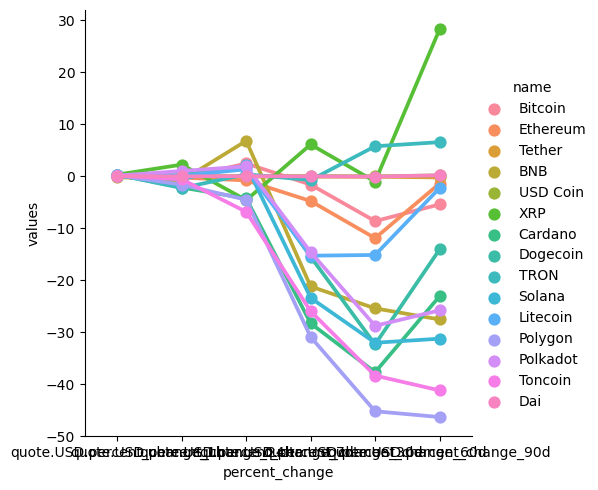

In [58]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [60]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,26437.82272,2023-06-19 01:14:02.757810


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

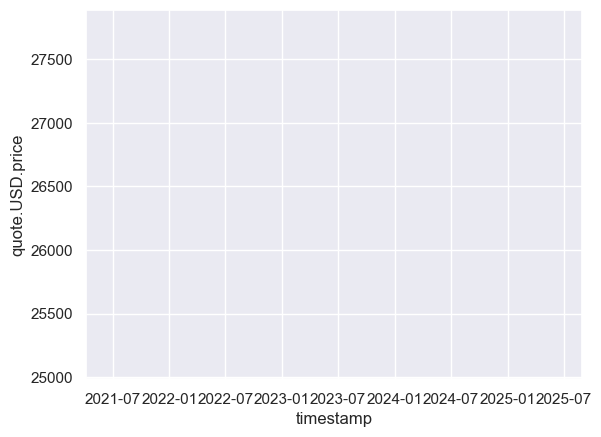

In [61]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)